We will start with a relatively simple question, but with a difficult journey to get any answers:

- What are the differences in reception between two fiction genres in the context of Goodreads?

We look at Goodreads reviews at different scales and with different selection criteria.

In [1]:
# This reload library is just used for developing the REPUBLIC hOCR parser 
# and can be removed once this module is stable.
%reload_ext autoreload
%autoreload 2

# This is needed to add the repo dir to the path so jupyter
# can load the modules in the scripts directory from the notebooks
import os
import sys
repo_dir = os.path.split(os.getcwd())[0]
print(repo_dir)
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import os

data_dir = '../data/GoodReads'

books_10k_file = os.path.join(data_dir, 'goodreads_reviews-books_above_10k_lang_reviews.csv.gz')
reviewers_5k_file = os.path.join(data_dir, 'goodreads_reviews-reviewers_above_5k_reviews.csv.gz')
random_1M_file = os.path.join(data_dir, 'goodreads_reviews-random_sample_1M.csv.gz')
author_file = os.path.join(data_dir, 'goodreads_book_authors.csv.gz') # author information
book_file = os.path.join(data_dir, 'goodreads_books.csv.gz') # basic book metadata


/Users/marijnkoolen/Code/Huygens/scale


In [2]:
# the review dataframe
review_df = pd.read_csv(random_1M_file, sep='\t', compression='gzip')

review_df

,user_id,book_id,review_id,rating,date_added,date_updated,read_at,started_at,n_votes,n_comments,review_length,review_text
0,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,93,Recommended by Don Katz. Avail for free in Dec...
1,8842281e1d1347389f2ab93d60773d4d,8191070,8fb75b37b3613a34e39169f139870f31,5,Fri Nov 18 17:43:26 -0800 2016,Thu Aug 03 22:54:31 -0700 2017,Mon Jul 24 09:32:34 -0700 2017,Mon May 08 07:52:12 -0700 2017,25,0,2585,"Best book of the series, and best book about A..."
2,8842281e1d1347389f2ab93d60773d4d,40955,299706d01666058b1fb2a96b29a1260b,5,Sun Nov 18 16:31:28 -0800 2012,Wed Dec 21 10:43:14 -0800 2016,Fri Apr 17 00:00:00 -0700 2015,Mon Apr 06 00:00:00 -0700 2015,5,1,4734,A truly inspirational book by a truly inspirat...
3,8842281e1d1347389f2ab93d60773d4d,4986701,bb7de32f9fadc36627e61aaef7a93142,4,Thu Aug 04 10:02:02 -0700 2011,Thu Aug 04 10:02:02 -0700 2011,NaN,NaN,6,4,73,"Found the Goodreads down image in this, and ma..."
4,8842281e1d1347389f2ab93d60773d4d,77566,cedb8b21ea6ad95b05fa3868e05488e6,5,Wed Mar 12 16:37:16 -0700 2008,Wed Mar 22 11:46:03 -0700 2017,Fri Oct 19 00:00:00 -0700 2012,Wed Sep 19 00:00:00 -0700 2012,4,2,284,Seven amazing stories. Each one you think can'...
...,...,...,...,...,...,...,...,...,...,...,...,...
1008006,8ba77e3c745ebddccc6306fc3c6bb25e,174198,95c7b6304251a1d94d6d1af8313f8ae7,5,Mon Jul 08 11:47:23 -0700 2013,Sat Jul 22 15:50:08 -0700 2017,NaN,Sat Jul 22 00:00:00 -0700 2017,0,0,177,No finer Maine writer ever lived than Sarah Or...
1008007,e223be160b89f218dbee70b5fbdccf76,22892469,47c31eb080291307e4c2c4e964264003,5,Sun Aug 10 20:41:33 -0700 2014,Tue Aug 26 13:53:08 -0700 2014,Mon Aug 11 21:36:42 -0700 2014,Tue Mar 25 00:00:00 -0700 2014,0,0,976,Love Songs With Bright Blue Chippiness Happi...
1008008,e223be160b89f218dbee70b5fbdccf76,22891145,9514f23d8a4f835e3a417afd67954859,5,Sun Aug 10 14:21:44 -0700 2014,Tue Aug 26 13:41:10 -0700 2014,Sun Aug 10 14:25:39 -0700 2014,Sun Aug 03 00:00:00 -0700 2014,0,0,249,Great Times. My Brand New 2014 KIA OPTIMA EX...
1008009,e223be160b89f218dbee70b5fbdccf76,20369388,7c1395ba0a319423707d8ffff79aeafc,5,Fri Jun 06 22:32:23 -0700 2014,Tue Aug 26 14:07:08 -0700 2014,Sun Aug 10 16:25:37 -0700 2014,Wed Dec 25 00:00:00 -0800 2013,0,0,365,"Jail. = Boring. I Beat People Down. ""You Are..."


In [3]:
from dateutil.parser import parse, tz

def parse_date(date_str):
    try:
        return parse(date_str).astimezone(utc)
    except TypeError:
        return None

utc = tz.gettz('UTC')

review_df['date_added'] = review_df.date_added.apply(parse_date)
review_df['date_updated'] = review_df.date_updated.apply(parse_date)
review_df['read_at'] = review_df.read_at.apply(parse_date)
review_df['started_at'] = review_df.started_at.apply(parse_date)


In [4]:
print('Number of empty reviews:', len(review_df[review_df.review_length == 0]))
review_df = review_df[review_df.review_length > 0]

Number of empty reviews: 411


In [5]:
# get a list of book ids that are in the review dataset
review_book_ids = set(review_df.book_id.unique())

# load basic book metadata (only book and author id and book title)
metadata_columns = ['book_id', 'work_id', 'author_id', 'title', 'num_pages', 'publication_year']
bookmeta_df = pd.read_csv(book_file, sep='\t', compression='gzip', usecols=metadata_columns)

def get_first(row):
    try:
        return first[row['work_id']]
    except KeyError:
        return None

first = bookmeta_df[bookmeta_df.publication_year.notna()].groupby(['work_id']).publication_year.min()
bookmeta_df['first_publication_year'] = bookmeta_df.apply(get_first, axis=1)

# filter the book metadata to only the book ids in the review dataset
bookmeta_df = bookmeta_df[bookmeta_df.book_id.isin(review_book_ids)]

# load the author metadata to get author names 
author_df = pd.read_csv(author_file, sep='\t', compression='gzip', usecols=['author_id', 'name'])
author_df = author_df.rename(columns={'name': 'author_name'})

# merge the book and author metadata into a single dataframe, 
# keeping only author names for books in the review dataset
metadata_df = pd.merge(bookmeta_df, author_df, how='left')

# merge the review dataset with the book metadata
review_df = pd.merge(review_df, metadata_df, on='book_id')

In [ ]:
genre_file = os.path.join(data_dir, 'goodreads_book_genres_initial.csv.gz') # book genre information

genremeta_df = pd.read_csv(genre_file, sep='\t', compression='gzip')
genre_df = genremeta_df[genremeta_df.book_id.isin(review_book_ids)]

groups = genre_df.groupby(['book_id', 'genres']).size()
genre_df = groups.unstack('genres').fillna(0)
genre_df = genre_df.reset_index()
print('number of books with genre information:', len(genre_df))

review_df = pd.merge(review_df, genre_df, on='book_id', how='left')



In [13]:
# This step writes the current dataframe to file, 
# so all the merging steps can be skipped in reruns of the notebook
merged_data_file = '../data/Goodreads/goodreads_reviews-random_sample_1M.genre_merged.csv.gzip'
#review_df.to_csv(merged_data_file, sep='\t', compression='gzip')

review_df = pd.read_csv(merged_data_file, sep='\t', compression='gzip')

In [6]:
genres = list(genre_df.columns)[1:]
print(genres)

print('Number of reviews per genre:')
for genre in genres:
    print(f'{genre: <40}{len(review_df[review_df[genre] == 1]): >10}')

genre_df

number of books with genre information: 394888
['children', 'comics, graphic', 'fantasy, paranormal', 'fiction', 'history, historical fiction, biography', 'mystery, thriller, crime', 'non-fiction', 'poetry', 'romance', 'young-adult']
Number of reviews per genre:
children                                    127656
comics, graphic                              90404
fantasy, paranormal                         446156
fiction                                     918241
history, historical fiction, biography      354004
mystery, thriller, crime                    409302
non-fiction                                 199731
poetry                                       34223
romance                                     573330
young-adult                                 408106


genres,book_id,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
394883,36488099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
394884,36494299,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
394885,36498328,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
394886,36508486,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


The genres have been added as separate columns to the review dataframe, so that it's easy to select reviews for books in a specific genre. 

The *poetry* and *comics, graphics* genres are the smallest genres, with fewer than 100,000 reviews. The *fiction* genre is by far the largest, as it is operates as a aggregate genre with various fiction sub-genres. That is, most of the other genres overlap with the fiction genre. We can check the co-occurrence matrix to see the overlap in genres in more detail.

In [7]:
temp_df = genre_df[genres].fillna(0)
cooc = temp_df.T.dot(temp_df)
for genre in genres:
    cooc[genre] = cooc[genre] / cooc.loc[genre, genre]
cooc

genres,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
genres,,,,,,,,,,
children,1.000000,0.191590,0.175501,0.146700,0.112336,0.088749,0.111877,0.225352,0.057495,0.306383
"comics, graphic",0.126993,1.000000,0.110228,0.087730,0.106668,0.066126,0.139249,0.083344,0.038440,0.113899
"fantasy, paranormal",0.438581,0.415578,1.000000,0.394200,0.244037,0.436022,0.075148,0.215661,0.374391,0.558983
fiction,0.822499,0.742068,0.884404,1.000000,0.735828,0.889048,0.400419,0.682194,0.807116,0.894502
"history, historical fiction, biography",0.281570,0.403359,0.244766,0.328955,1.000000,0.286203,0.617135,0.365616,0.248429,0.255079
"mystery, thriller, crime",0.216797,0.243701,0.426215,0.387356,0.278932,1.000000,0.097284,0.075527,0.337044,0.342905
non-fiction,0.192056,0.360638,0.051622,0.122602,0.422671,0.068366,1.000000,0.411616,0.034997,0.093471
poetry,0.067421,0.037618,0.025819,0.036403,0.043641,0.009250,0.071736,1.000000,0.014779,0.027005
romance,0.192056,0.193719,0.500437,0.480868,0.331079,0.460884,0.068099,0.165008,1.000000,0.555633


Above we see the co-occurrence of genres per book (a book can have multiple genre labels). The data in the co-occurrence matrix shows proportions. So the diagional cells from top left to bottom right are always 1.0 (a genre necessarily co-occurs with itself). 

The general *fiction* genre overlaps strongly with most other genres. That is, the other genres are sub-genres of fiction (we selected only books that had at least a *fiction* genre label). 

The *poetry* and *comics, graphic* genres are very distinct from the other subgenres. 

The genres *fantasy, paranormal* has a moderate overlap with *children*, *mystery, thriller, crime*, *romance*, *young-adult*.

The *history, historical fiction, biography* genre has more overlap with *comics, graphic*, *poetry* and especially *non-fiction*. 

For genre comparison, we will choose three genres:

- *history, historical fiction, biography*
- *mystery, thriller, crime*
- *romance*


We'll start with a quantitative analysis of the metadata.


In [8]:
from itertools import combinations

review_genre_df = review_df[genres].fillna(0)

cooc = review_genre_df.T.dot(review_genre_df)

for genre in genres:
    cooc[genre] = cooc[genre] / cooc.loc[genre, genre]

cooc



,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
children,1.000000,0.198719,0.160845,0.124326,0.107536,0.092824,0.103409,0.230634,0.052394,0.220813
"comics, graphic",0.140730,1.000000,0.085360,0.078287,0.127202,0.058419,0.204105,0.100167,0.028307,0.085341
"fantasy, paranormal",0.562151,0.421265,1.000000,0.460581,0.308536,0.537740,0.088349,0.267510,0.455903,0.614448
fiction,0.894286,0.795164,0.947929,1.000000,0.822923,0.941117,0.515178,0.787804,0.897502,0.952561
"history, historical fiction, biography",0.298208,0.498097,0.244809,0.317257,1.000000,0.274897,0.670702,0.395874,0.240205,0.240575
"mystery, thriller, crime",0.297620,0.264491,0.493321,0.419499,0.317838,1.000000,0.111340,0.101511,0.380636,0.394062
non-fiction,0.161794,0.450931,0.039551,0.112059,0.378414,0.054332,1.000000,0.434971,0.034382,0.073177
poetry,0.061830,0.037919,0.020520,0.029362,0.038271,0.008488,0.074530,1.000000,0.014156,0.022729
romance,0.235312,0.179516,0.585856,0.560381,0.389027,0.533176,0.098693,0.237150,1.000000,0.667596
young-adult,0.705921,0.385248,0.562046,0.423359,0.277341,0.392910,0.149521,0.271046,0.475206,1.000000


In [9]:
compare_genres = ['history, historical fiction, biography', 'mystery, thriller, crime', 'romance']
genre_df = {}
for genre in compare_genres:
    genre_df[genre] = review_df[review_df[genre] == 1]


We check the rating distribution to see if there are differences in rating behaviour between genres.

<AxesSubplot:xlabel='rating'>

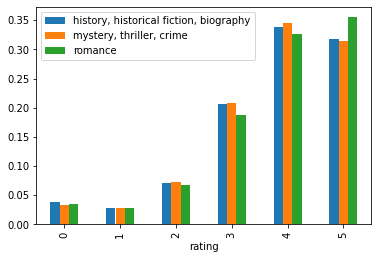

In [283]:
rating_series = []
for genre in compare_genres:
    group = review_df.groupby(['rating', genre]).size()
    u = group.unstack(genre)
    u = u.rename(columns={1.0: genre})
    u[genre] = u[genre] / sum(u[genre])
    rating_series.append(u[genre])

pd.concat(rating_series, axis=1).plot(kind='bar')

There are no big differences. The distributions look fairly similar in terms of rating behaviour. The *romance* genre has a slightly higher proportion of 5-star ratings and a lower proportion of 3- and 4-star ratings than the other two genres. 

### Number of reviews per reviewer, author and book

Some books and authors are very popular and are reviewed by many different readers, which leads to these books and authors having more influence on the overall picture we get for a genre than books that are relatively obscure. So understanding differences between genres in terms of the *content* of reviews is aided by looking at differences in the actors that influence what content is generated and how it is generated. 

Another set of actor influencing this review generation process are the reviewers. Some reviewers write many reviews and have developed conventions for how to write them and what to included in them, others only write an occasional review and perhaps write whatever comes to mind. Some reviewers are very elaborate and discuss the story, writing style and reading experience of a book in detail, while others are succinct and focus the most salient aspect. Some focus more narrative, others on aesthetics and yet others on their own thoughts and feelings.

If there differences in reviewers across genres, or in popularity of authors and books, these can help explain differences in content. We first look at total numbers of reviews, reviewers, authors and books across the three genres.



In [284]:
print('Genre\t\t\t\t\t\tReviews\t\tReviewers\tAuthors\t\tBooks')
stats_columns = ['review_id', 'user_id', 'author_id', 'work_id']
freq = {}
for genre in compare_genres:
    stats_string = ''
    for column in stats_columns:
        freq[(genre, column)] = genre_df[genre][column].nunique()
        stats_string += f'{freq[(genre, column)]: >16}'
    print(f'{genre: <38}{stats_string}')
    

Genre						Reviews		Reviewers	Authors		Books
history, historical fiction, biography          321138          114796           57498           88774
mystery, thriller, crime                        377140          122850           39462           82799
romance                                         526310          136499           44263          122257


In [285]:
print(f'{"Genre": <44}{"Reviewers": <16}{"Authors": <16}{"Books": <16}')
print(f'{"Genre": <44}{"mean median": <16}{"mean median": <16}{"mean median": <16}')

for genre in compare_genres:
    stats_string = ''
    for column in stats_columns[1:]:
        prop = freq[(genre, 'review_id')] / freq[(genre, column)]
        median = np.median(genre_df[genre][column].value_counts())
        stats_string += f'{prop: >10.2f}{median: >6.0f}'
    print(f'{genre: <38}{stats_string}')
    

Genre                                       Reviewers       Authors         Books           
Genre                                       mean median     mean median     mean median     
history, historical fiction, biography      2.80     1      5.59     1      3.62     1
mystery, thriller, crime                    3.07     2      9.56     2      4.55     2
romance                                     3.86     2     11.89     2      4.30     2


Above we show the average number of reviews per reviewer, author and book (both the mean and the median). There are some significant differences between the three genres. In the *romance* genre, individual reviewers write more reviews, and more there are more reviews per author, especially in comparison with *history, historical fiction, biography*. Reviewers tend to read (or at least review) more books, and also more books by the same author. **This may have consequences for the comparison.** If individual reviewers have personal characteristics that influence reviews (e.g. a tendency to write long or short reviews, to use certain vocabulary, to focus their reviews on certain book aspects), this has an influence in what are statistical commonalities and differences. 

With more reviews by the same reviewer, their idiosyncracies have relatively high frequency. Also, the reviews of books by the same author may all mention the same author name, or if the books belong to a series, characters and place may recur, which also results in higher relative frequencies.

So, in the comparative analysis, one question is whether to compensate for these kinds of differences and if so, how. For instance, should we balance the selection to only include a single review per reviewer, book and author, or to leave the natural imbalance in tact. 

**If the goal of the comparison is to say something about reviews in a certain genre in general**, we should perhaps let the different frequencies come through as characteristics for indidivual genres. **If, on the other hand, the goal is to compare the reception of books in a genre**, these imbalances should probably be compensated for, or at least be taken into account in interpreting the observed similarities and differences. 

But there is a problem with the analysis above, which is signaled by the difference between the mean and median. We calculated the mean number of reviews per reviewer author and book, but statistics like mean are only meaningful if the data is roughly normally distributed (see the [Analyzing Distributions](./Analyzing-Distributions.ipynb) notebook for an elaboration on the problem). When the data distribution is very skewed, such statistics are deceptive. When most items in a set have a low frequency, and there is a small number of outliers with a very high frequency, the outliers drive up the mean, such that the majority of the items are below average.


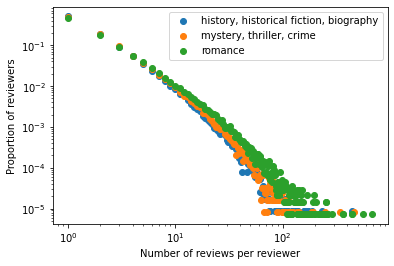

In [287]:
from collections import Counter
from scripts.helper import ecdf

for genre in compare_genres:
    dist = Counter([int(count) for count in genre_df[genre].user_id.value_counts()])
    x = dist.keys()
    y = list(dist.values())
    y_prob = [y_point / sum(y) for y_point in y]
    plt.scatter(x,y_prob, label=genre)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Proportion of reviewers')
plt.xlabel('Number of reviews per reviewer')
plt.legend()
plt.show()


Above we see the number of reviews per reviewer against the number of reviewers. At the top left we see that the vast majority of reviewers in all three genres write only one or a few reviews. The proportion is shown on a logarithmic scale, so the dots for a single review per reviewer are between 40% and 60% of all reviewers, while all dots for more than 10 reviews per reviewers quickly fall far below 1%. But the genres show a difference in their distributions at the higher end (i.e. above 10 reviews per reviewer). What this means is, **there is larger proportion of reviewers in the *romance* genre who write many reviews than in the other genres, but these represent only a few percent of all reviewers.**


Next, we look at the number of reviews per author.

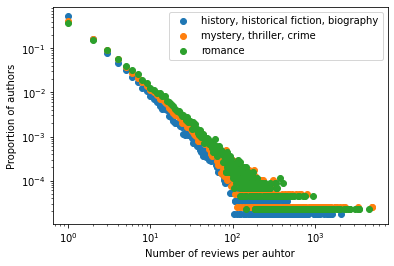

In [288]:
from collections import Counter
from scripts.helper import ecdf

for genre in compare_genres:
    dist = Counter([int(count) for count in genre_df[genre].author_id.value_counts()])
    x = dist.keys()
    y = list(dist.values())
    y_prob = [y_point / sum(y) for y_point in y]
    plt.scatter(x,y_prob, label=genre)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Proportion of authors')
plt.xlabel('Number of reviews per auhtor')
plt.legend()
plt.show()


Above we see the log-log distribution of the number reviews per author. The *history, historical fiction, biography* genre has relatively many authors with only a single review (the blue dot in the top left is higher than the top left green and orange dot), and therefore fewer authors with multiple reviews (more the right, the blue dots tend be below the green and orange dots). In other words, for most authors in this genre a comparison is difficult because there is only a single review for it. **But for all three genres, the majority of authors have only one or a few reviews, so the much higher average for *romance* authors than for *history, historical fiction, biography* authors is caused by a relatively small set of outliers with a very high number of reviews.**

A possible explanation is that there is a subset of authors writings *romance* novels or *mystery, thriller, crime* novels who are more prolific than authors of *historical* novels and *biographies*.

In [10]:
# group by author and cont the number of works they wrote
g = metadata_df.groupby(['author_id']).work_id.nunique()
# turn series into a dataframe and rename the column to reflect the number of works per author
u = g.reset_index()
u = u.rename(columns={'work_id': 'author_works_num'})
# merge the new dataframe with the metadata dataframe created at the top of this notebook
meta_df = pd.merge(metadata_df, u, on='author_id')
# create a dataframe for all books and their genre labels, with one column per genre
groups = genremeta_df.groupby(['book_id', 'genres']).size()
genremeta_df = groups.unstack('genres').fillna(0)
genremeta_df = genremeta_df.reset_index()
# merge the new genre metadata frame with the extended book metadata frame 
# so we can connect nmber of works per author with the genre labels
meta_df = pd.merge(meta_df, genremeta_df, on='book_id')


history, historical fiction, biography  	authors:  57498	works:   190384	single work authors:  33085
mystery, thriller, crime                	authors:  39462	works:   186422	single work authors:  15953
romance                                 	authors:  44263	works:   196750	single work authors:  18319


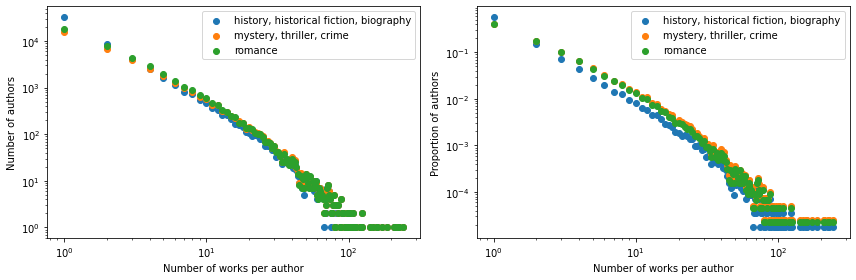

In [11]:
fig = plt.figure(tight_layout=True, figsize=(12,4))
plt.subplot(1,2,1)
for genre in compare_genres:
    temp_df = meta_df[meta_df[genre] == 1]
    temp_df = temp_df[['author_id', 'author_works_num']].drop_duplicates()
    s = temp_df.author_works_num.value_counts().sort_index()
    u = s.reset_index()
    u = u.rename(columns={'index': 'author_works_num', 'author_works_num': 'num_authors'})
    plt.scatter(u.author_works_num, u.num_authors, label=genre)
plt.xlabel('Number of works per author')
plt.ylabel('Number of authors')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)
for genre in compare_genres:
    temp_df = meta_df[meta_df[genre] == 1]
    temp_df = temp_df[['author_id', 'author_works_num']].drop_duplicates()
    s = temp_df.author_works_num.value_counts().sort_index()
    u = s.reset_index()
    u = u.rename(columns={'index': 'author_works_num', 'author_works_num': 'num_authors'})
    plt.scatter(u.author_works_num, u.num_authors / sum(u.num_authors), label=genre)
    num_single_work_authors = int(u[u.author_works_num == 1].num_authors)
    print(f'{genre: <40}\tauthors: {sum(u.num_authors): >6}\tworks: {sum(u.author_works_num * u.num_authors): >8}\tsingle work authors: {num_single_work_authors: >6}')
plt.xlabel('Number of works per author')
plt.ylabel('Proportion of authors')
plt.xscale('log')
plt.yscale('log')
plt.legend()


In the entire dataset, there 186,360 different authors of *history, historical fiction, biography* books, which is the same as the number of different authors for *romance* and *mystery, thriller, crime* combined. **So one thing to take into account is that the *history* genre has many more distinct authors than the other two.** 

Above are two distribution plots. The first shows the number of works per author set off against the *number of authors* (how many authors have written X books). The second shows the number of works per author set off against the *proportion of authors* (what proportion authors have written X books).

First, there are many more authors in the *history* genre who write only one book than in the other genres. In the plot on the left, it is clear that for all three genres, the majority of authors write only one or a few books. But the first blue dots are above the other colored dots, which means that there are many more *history* authors with few books. At the higher end, the long tail of highly prolific author, there are few differences as the colored dots overlap so much that only the green dots are visible. **In other words, it is not that there are fewer prolific authors in the *history* genre than in the other two genres, but that there are many more *history* authors, and therefore, *proportionally* many more *history* authors with few books.** This is what the plot on the right shows. From 4 works per author and more, the blue dots are well below the others, showing that the *proportion* of authors with 4 works of more is lower in the *history* genre than in the other genres. 




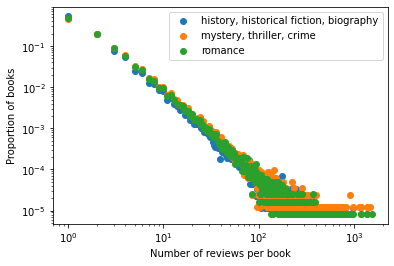

In [12]:
from collections import Counter
from scripts.helper import ecdf

for genre in compare_genres:
    dist = Counter([int(count) for count in genre_df[genre].work_id.value_counts()])
    x = dist.keys()
    y = list(dist.values())
    y_prob = [y_point / sum(y) for y_point in y]
    plt.scatter(x,y_prob, label=genre)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Proportion of books')
plt.xlabel('Number of reviews per book')
plt.legend()
plt.show()


Above we see number of reviews per book set of against the proportion of books. The three distributions show no big differences. In other words, book popularity behaves no differently between the three genres.

From the analyses of these three aspects (number of reviews per reviewer, per author and per book), we have learned that in the *romance* genre, there is a longer tail of more prolific reviewers than for the other genres, while the *history* genre has a higher peak of authors with just a single work. **In other words, there is *less* overlap in authors in the *history* reviews, and the is *more* overlap of reviewers in the *romance* reviews.** The *romance* genre is therefore *less* heterogeneous than the *mystery, thriller, crime* genre and especially than the *history, historical fiction, biography* genre.


In [295]:
review_df.groupby(['book_id', 'publication_year', review_df.date_updated.dt.year]).size()

book_id   publication_year  date_updated
1         2006.0            2014            111
                            2015             24
                            2016             51
                            2017             43
2         2004.0            2007              6
                                           ... 
36473367  2017.0            2017              1
36477938  2017.0            2017              5
36494299  2015.0            2017              1
36498328  2003.0            2017              1
36508486  2017.0            2017              1
Length: 463959, dtype: int64

history, historical fiction, biography 1951.0 2020.0
mystery, thriller, crime 1951.0 2020.0
romance 1951.0 2020.0


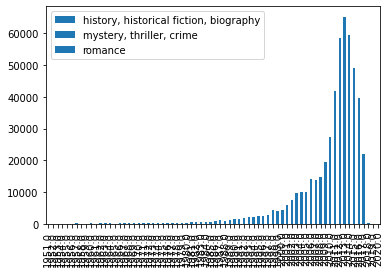

In [326]:
for genre in compare_genres:
    temp_df = genre_df[genre][(genre_df[genre].publication_year > 1950) & (genre_df[genre].publication_year <= 2020)]
    year_min = temp_df.publication_year.min()
    year_max = temp_df.publication_year.max()
    print(genre, year_min, year_max)
    temp_df.publication_year.value_counts().sort_index().plot(kind='bar', label=genre)

plt.legend()



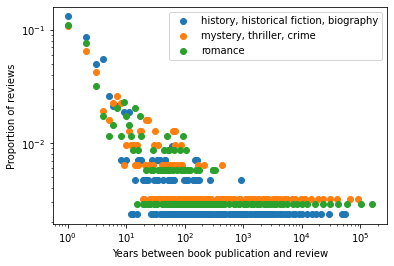

In [19]:
for genre in compare_genres:
    counts = (genre_df[genre].date_updated.dt.year - genre_df[genre].first_publication_year).value_counts()
    dist = Counter([int(count) for count in counts])
    x = dist.keys()
    y = list(dist.values())
    y_prob = [y_point / sum(y) for y_point in y]
    plt.scatter(x,y_prob, label=genre)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Proportion of reviews')
plt.xlabel('Years between book publication and review')
plt.legend()
plt.show()



In [324]:
temp_df  = review_df[(review_df.publication_year > 1950) & (review_df.publication_year <= 2020)]
#temp_df.publication_year.value_counts().sort_index().plot(kind='bar')
print(len(temp_df))

temp_df  = review_df[(review_df.publication_year <= 1950) | (review_df.publication_year > 2020)]
#temp_df.publication_year.value_counts().sort_index().plot(kind='bar')
print(len(temp_df))



917303
2223


In [ ]:
random_seed = 1205921

sample_df = review_df.sample(100, random_state=random_seed)


In [ ]:
from scripts.text_tail_analysis import write_docs_to_bin, read_docs_from_bin
#docs = [nlp(text) for text in reviews_en]
nlp_docs_file = f'../data/review_spacy_docs.random_1M.genre-{genre.replace(' ','_')}.sample-10000.seed-{random_seed}.docbin'

#write_docs_to_bin(docs, nlp_docs_file)

docs = read_docs_from_bin(nlp_docs_file, nlp)

# iterate over the docs, then over the entities in each doc and count them
tf = Counter([entity.text for doc in docs for entity in doc.ents])

print('Total number of entities in the sample:', sum(tf.values()))
tf.most_common(50)
